# Regresión Lineal


## Importaciones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Datos

Estos datos de muestra son de ISLR. Muestra las ventas (en miles de unidades) de un producto en particular en función de los presupuestos de publicidad (en miles de dólares) para los medios de televisión, radio y periódicos.

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

**¿Existe una relación entre el gasto total en publicidad y las ventas?**

In [3]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

<Axes: xlabel='total_spend', ylabel='sales'>

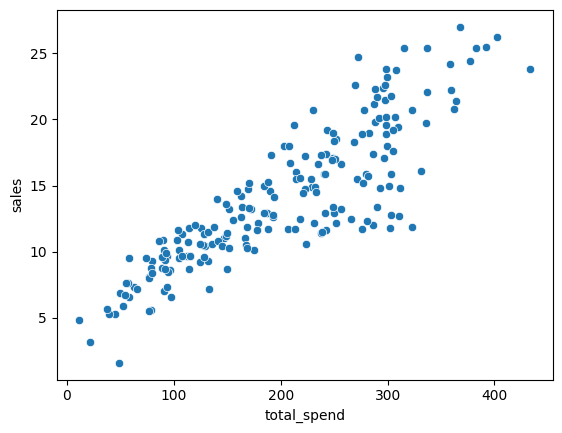

In [4]:
sns.scatterplot(x='total_spend',y='sales',data=df)

## Línea de mínimos cuadrados

Fórmulas completas es Wikipedia: https://en.wikipedia.org/wiki/Linear_regression ,así como la lectura ISLR.

<Axes: xlabel='total_spend', ylabel='sales'>

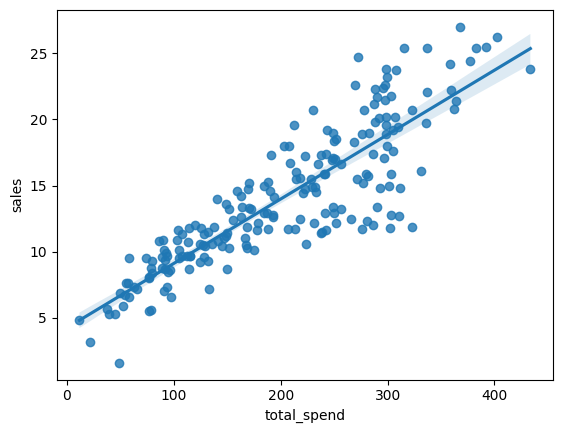

In [5]:
# Básicamente, queremos averiguar cómo crear esta línea.
sns.regplot(x='total_spend',y='sales',data=df)

$$y=mx+b$$

$$ \hat{y} = \beta_0 + \beta_1X$$

En mayúsculas para indicar que estamos tratando con una matriz de valores, tenemos una matriz conocida de etiquetas (números de ventas) Y y una matriz conocida de gastos totales (X). Vamos a resolver los coeficientes *beta*, que a medida que nos expandimos a más de una sola característica, serán importantes para comprender qué características tienen el mayor poder predictivo. Usamos "y" para indicar que "y" es una predicción o estimación, y sería una etiqueta verdadera/valor conocido.

In [6]:
X = df['total_spend']
y = df['sales']

In [7]:
# Devuelve la orden más alta coeficiento primero
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

In [8]:
# Posibles presupuestos de gastos futuros
potential_spend = np.linspace(0,500,100)

In [9]:
predicted_sales =  0.04868788*potential_spend + 4.24302822

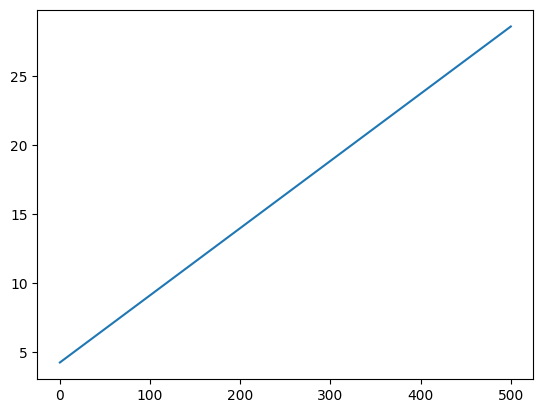

In [10]:
plt.plot(potential_spend,predicted_sales)

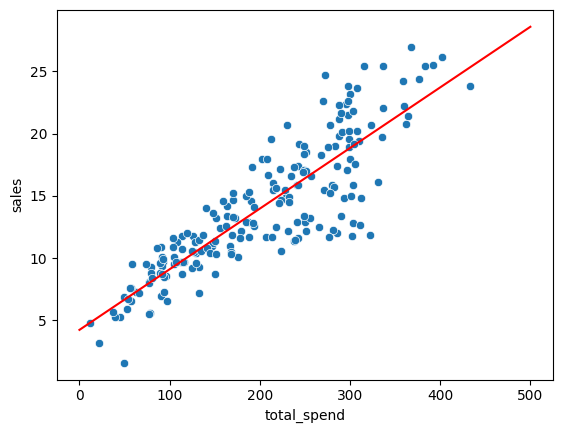

In [11]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

**Nuestra próxima campaña publicitaria tendrá un gasto total de $200, ¿cuántas unidades esperamos vender como resultado de esto?**

In [12]:
spend = 200
predicted_sales =  0.04868788*spend + 4.24302822

In [13]:
predicted_sales

13.98060422

## Sobreajuste, ajuste insuficiente y medición del rendimiento

Observe que ajustamos a order=1, esencialmente una línea recta, podemos comenzar a explorar órdenes más altos, pero ¿un orden más alto significa un mejor ajuste general? ¿Es posible encajar demasiado? ¿Demasiado poco? ¿Cómo sabríamos y cómo definimos un buen ajuste?

In [14]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [15]:
# Posibles presupuestos de gastos futuros
potential_spend = np.linspace(0,500,100)

In [16]:
predicted_sales =   3.07615033e-07*potential_spend**3 + -1.89392449e-04*potential_spend**2 + 8.20886302e-02*potential_spend**1 + 2.70495053e+00

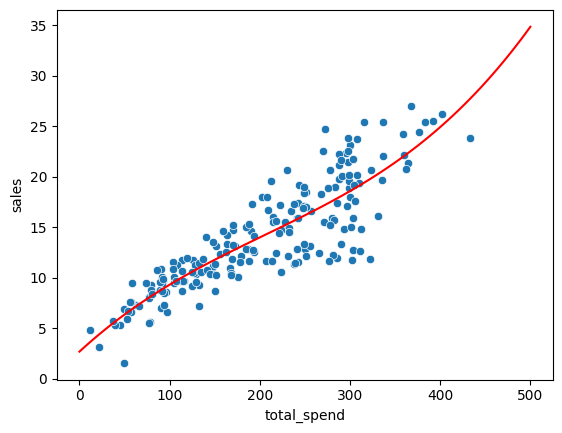

In [17]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

## Funciones múltiples

Los datos reales tenían 3 características, no todo en gasto total, ¿esto nos permitiría repetir el proceso y tal vez obtener un resultado más preciso?

In [18]:
X = df[['TV','radio','newspaper']]
y = df['sales']

**¡Polyfit solo funciona con una matriz 1D X! Tendremos que pasar a una biblioteca más potente...**

### Funciones múltiples (N-dimensiones)

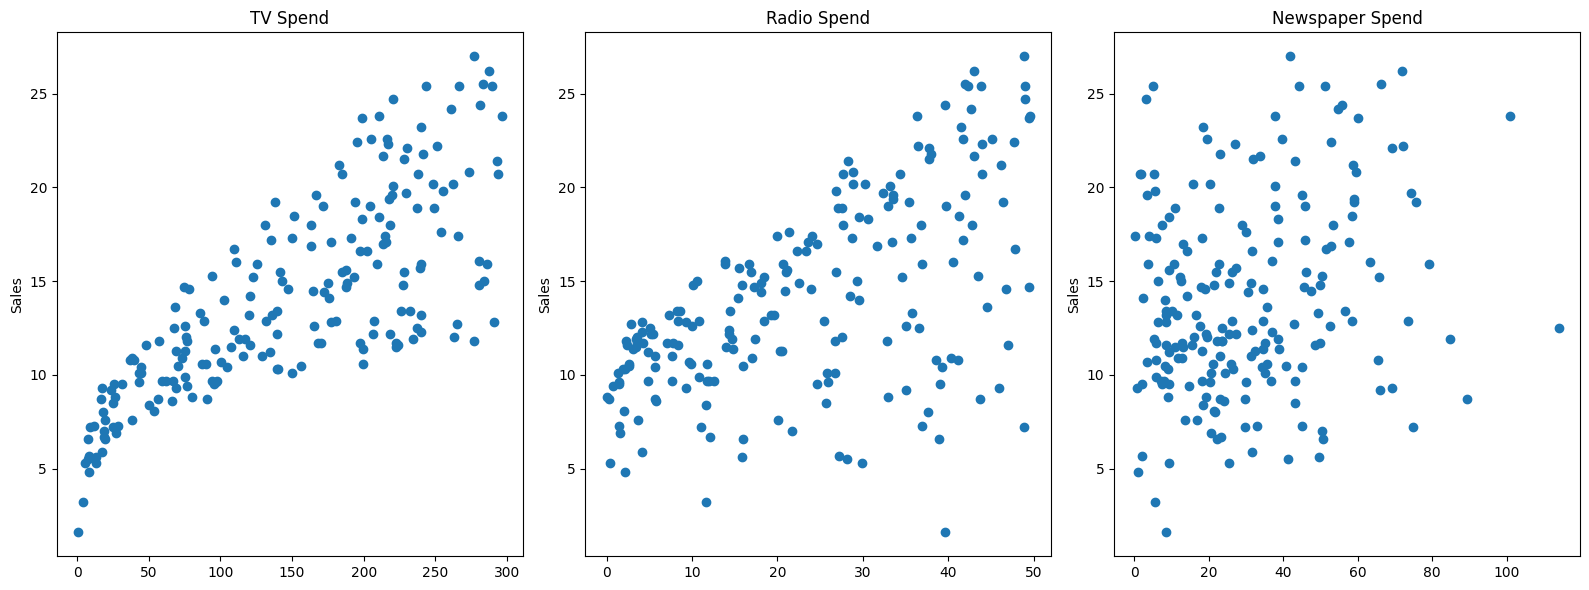

In [19]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

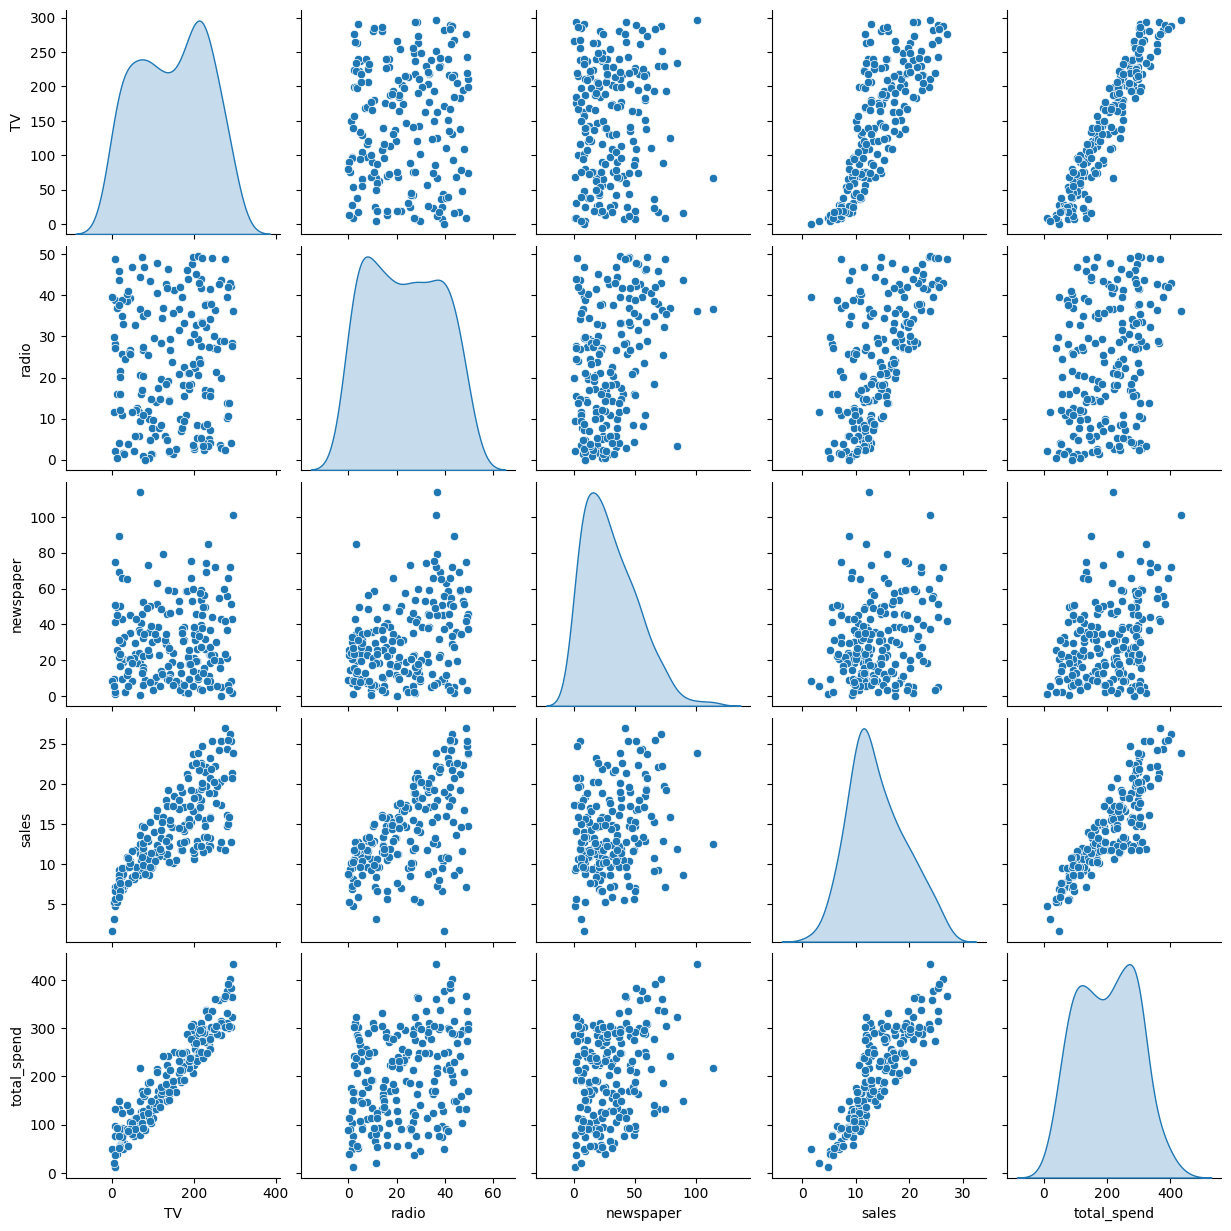

In [20]:
# Relaciones entre funciones
sns.pairplot(df,diag_kind='kde')

## Introducción a SciKit Learn

## División de conjuntos de pruebas y entrenamiento

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
X_train

TV  radio  newspaper
85   193.2   18.4       65.7
183  287.6   43.0       71.8
127   80.2    0.0        9.2
53   182.6   46.2       58.7
100  222.4    4.3       49.8
..     ...    ...        ...
63   102.7   29.6        8.4
70   199.1   30.6       38.7
81   239.8    4.1       36.9
11   214.7   24.0        4.0
95   163.3   31.6       52.9

[140 rows x 3 columns]

In [24]:
y_train.head()

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
Name: sales, dtype: float64

In [25]:
X_test.head()

TV  radio  newspaper
37    74.7   49.4       45.7
109  255.4   26.9        5.5
31   112.9   17.4       38.6
89   109.8   47.8       51.4
66    31.5   24.6        2.2

In [26]:
y_test.head()

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

## Creación de un modelo (Estimador)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

### Ajustar/entrenar el modelo en los datos de entrenamiento

Asegúrese de que solo se ajuste a los datos de entrenamiento para poder evaluar de manera justa el rendimiento de su modelo en datos futuros

In [29]:
model.fit(X_train,y_train)

LinearRegression()

## Comprender y utilizar el modelo

-----

### Evaluación en el conjunto de prueba

### Métricas

Las tres métricas de evaluación más comunes para problemas de regresión:

**Mean Absolute Error** (MAE) es la media del valor absoluto de los errores:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) es la media de los errores al cuadrado:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando estas métricas:

- **MAE** es el más fácil de entender, porque es el error promedio.
- **MSE** es más popular que MAE, porque MSE "castiga" los errores más grandes, lo que tiende a ser útil en el mundo real.
- **RMSE** es incluso más popular que MSE, porque RMSE es interpretable en las unidades "y".

All of these are **loss functions**, because we want to minimize them.

### Calcular el rendimiento en el conjunto de prueba

Queremos evaluar nuestro modelo de manera justa, por lo que obtenemos métricas de rendimiento en el conjunto de prueba (datos que el modelo nunca antes había visto).

In [30]:
test_predictions = model.predict(X_test)

In [31]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [33]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [34]:
MAE

1.213745773614481

In [35]:
MSE

2.2987166978863796

In [36]:
RMSE

1.5161519375993884

In [37]:
df['sales'].mean()

14.0225

## Implementación, predicciones y atributos del modelo

In [38]:
y_hat = model.predict(X)

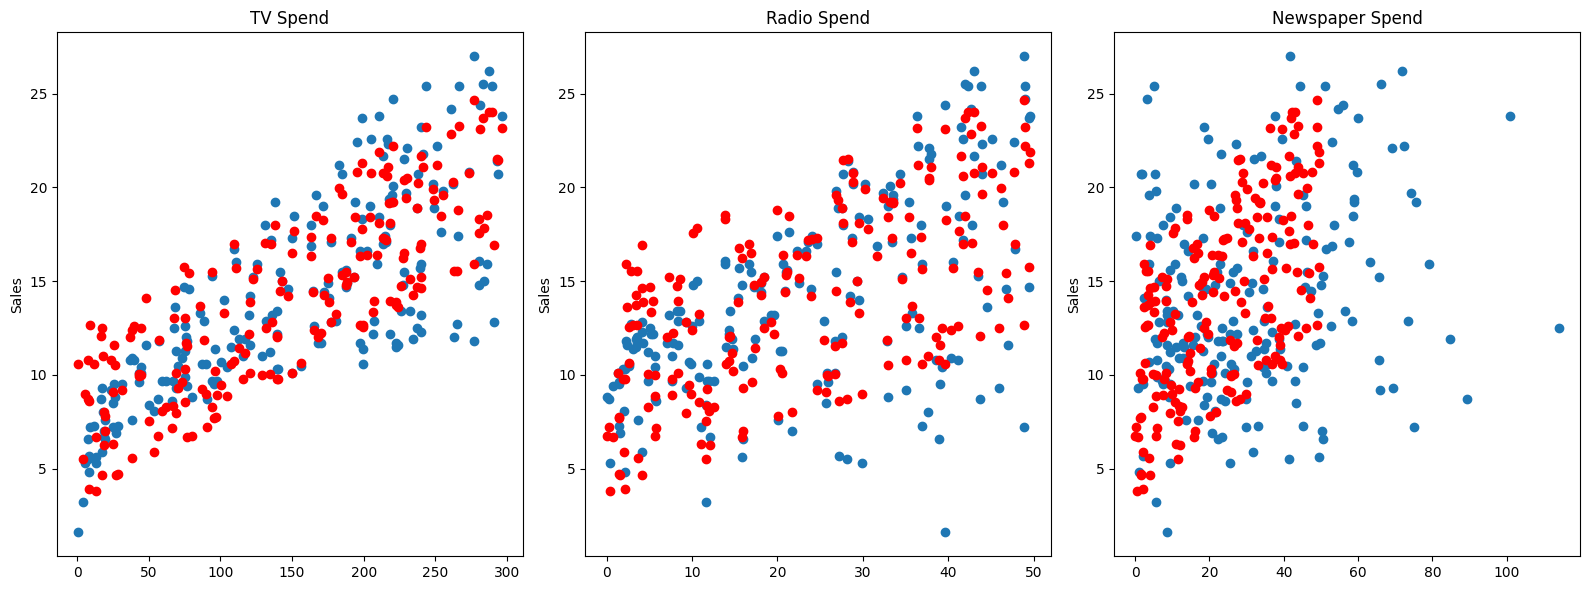

In [39]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [40]:
residuals = y_hat - y

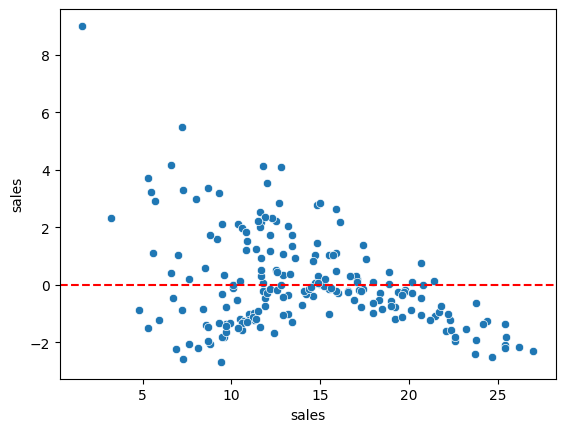

In [41]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

### Coeficientes

In [42]:
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [43]:
model.intercept_

3.1515267680706547

In [44]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
TV            0.044696
radio         0.187566
newspaper    -0.000323

Interpretando los coeficientes:

---
* Manteniendo todas las demás funciones fijas, un aumento de 1 unidad (mil dólares) en el gasto de TV se asocia con un aumento en las ventas de 0,045 "unidades de venta", en este caso miles de unidades.
* Esto básicamente significa que por cada $1000 dólares gastados en anuncios de televisión, podemos esperar que se vendan 45 unidades más.
----

* Manteniendo fijas todas las demás funciones, un aumento de 1 unidad (mil dólares) en el gasto de radio está asociado con un aumento en las ventas de 0,188 "unidades de venta", en este caso miles de unidades.
* Esto básicamente significa que por cada $1000 dólares gastados en anuncios de radio, podemos esperar que se vendan 188 unidades más.
----

* Manteniendo todas las demás funciones fijas, un aumento de 1 unidad (mil dólares) en el gasto de periódicos está asociado con una **disminución** en las ventas de 0,001 "unidades de venta", en este caso miles de unidades.
* Esto básicamente significa que por cada $ 1000 dólares gastados en anuncios de periódicos, en realidad podríamos esperar vender 1 unidad menos. Al estar tan cerca de 0, esto implica en gran medida que el gasto en periódicos no tiene un efecto real en las ventas.
---

**¡Nota! En este caso, todas nuestras unidades eran las mismas para cada característica (1 unidad = $1000 de inversión publicitaria). Pero en otros conjuntos de datos, las unidades pueden no ser las mismas, por ejemplo, un conjunto de datos de viviendas podría tratar de predecir un precio de venta con una función para la cantidad de dormitorios y una función para el área total, como pies cuadrados. En este caso, tendría más sentido *normalizar* los datos para poder comparar claramente las características y los resultados.**

In [45]:
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

In [46]:
X.head()

TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

In [47]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


#Predict for all points on the mesh

pred = model.predict(df[['TV',	'radio',	'newspaper']])
df['pred'] = pred

fig = px.scatter_3d(df, x='TV', y='radio', z='newspaper', color='pred')
fig.update_traces(marker=dict(size=5))
fig.show()

### Trazado de residuos

También es importante graficar los residuos y verificar la distribución normal, esto nos ayuda a comprender si la regresión lineal fue una opción de modelo válida.

In [48]:
test_predictions = model.predict(X_test)

In [49]:
test_res = y_test - test_predictions

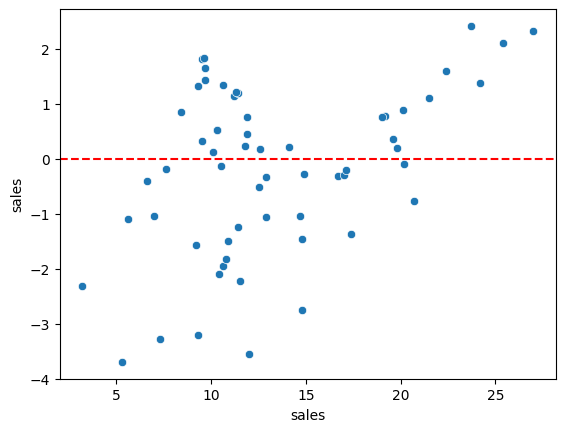

In [50]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [51]:
len(test_res)

60

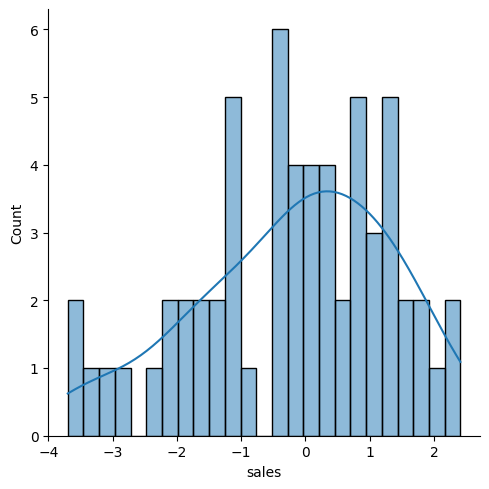

In [52]:
sns.displot(test_res,bins=25,kde=True)

In [53]:
import scipy as sp

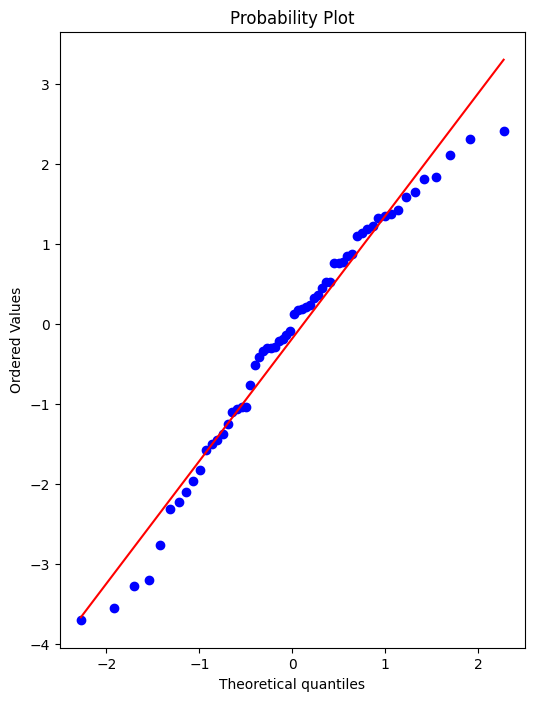

In [54]:
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(test_res,plot=ax)